# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#Loading dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/AIML_IITG/Unsupervised Machine Learning/Datasets/Mall_Customers.csv'
)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

# Scaling the data

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(X)

# finding best value of clusters

In [6]:
inertia = []
for i in range(2,11):
  model = KMeans(max_iter=1000,n_clusters=i)
  labels = model.fit_predict(x_scaled)
  inertia.append(model.inertia_)

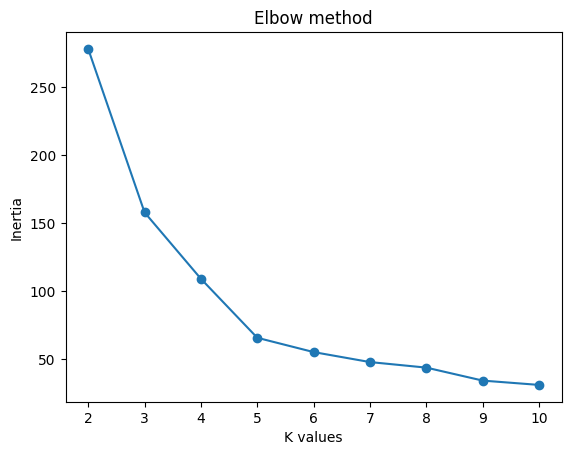

In [7]:
plt.plot(range(2,11),inertia,marker = 'o')
plt.xlabel('K values')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

# Best model with cluster = 5

In [8]:
best_model = KMeans(max_iter=1000,n_clusters=5)
labels = best_model.fit_predict(x_scaled)
labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

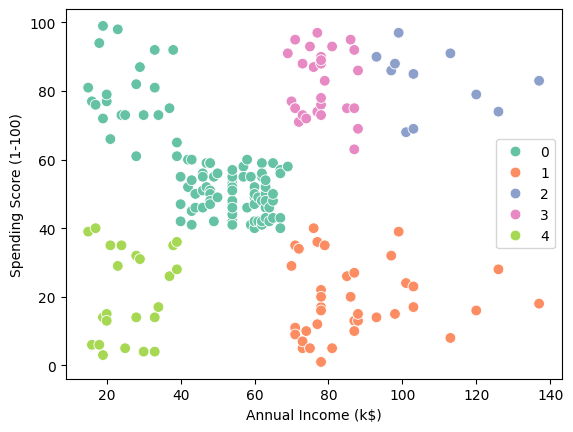

In [9]:
sns.scatterplot(data = X,x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue = labels,palette='Set2',s = 60)